In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
data = pd.read_csv("/content/spam.csv", encoding = "latin-1")

In [15]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data = data[['v1','v2']]
data = data.rename(columns = {'v1': 'label', 'v2': 'text'})

In [ ]:
def process(msg):
    msg = nltk.word_tokenize(msg)
    msg = [t.lower() for t in msg if t.isalpha()]
    msg = [t for t in msg if not t in stop_words]
    msg = [lemmatizer.lemmatize(t) for t in msg ]
    p = msg
    p = " ".join(word for word in p)
    msg = p
    return msg


In [ ]:
for i in range(data['text'].shape[0]):
    data['text'][i] = process(data['text'][i])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data['text'],data['label'],test_size = 0.2,random_state = 1)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [ ]:
def model_assessment(y_test,predicted_class):
    print('confusion matrix')
    print(confusion_matrix(y_test,predicted_class))
    print('accuracy')
    print(accuracy_score(y_test,predicted_class))
    print('precision')
    print(precision_score(y_test,predicted_class,pos_label='spam'))
    print('recall')
    print(recall_score(y_test,predicted_class,pos_label='spam'))
    print('f-Score')
    print(f1_score(y_test,predicted_class,pos_label='spam'))
    print('AUC')
    print(roc_auc_score(np.where(y_test=='spam',1,0),np.where(predicted_class=='spam',1,0)))
    plt.matshow(confusion_matrix(y_test, predicted_class), cmap=plt.cm.binary, interpolation='nearest')
    plt.title('confusion matrix')
    plt.colorbar()
    plt.ylabel('expected label')
    plt.xlabel('predicted label')

In [ ]:
X_test = vectorizer.transform(X_test)

## Naive Bayes

In [ ]:
#train data
model1 = MultinomialNB()
model1.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

confusion matrix
[[975   1]
 [ 25 114]]
accuracy
0.9766816143497757
precision
0.991304347826087
recall
0.8201438848920863
f-Score
0.8976377952755905
AUC
0.9095596473640759
None


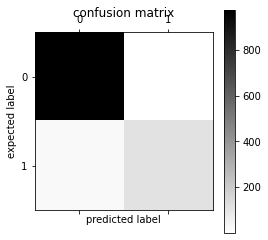

In [ ]:
y_pred1 = model1.predict(X_test)
from sklearn.metrics import accuracy_score
print(model_assessment(y_test,y_pred1))



## Support Vector Machine

In [ ]:
model2 = LinearSVC()
model2.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

confusion matrix
[[975   1]
 [ 11 128]]
accuracy
0.989237668161435
precision
0.9922480620155039
recall
0.920863309352518
f-Score
0.9552238805970149
AUC
0.9599193595942918
None


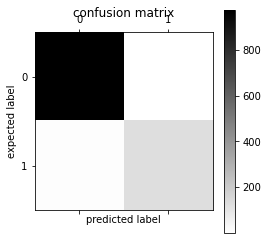

In [ ]:
y_pred2 = model2.predict(X_test)
print(model_assessment(y_test,y_pred2))

## Decision Tree

In [ ]:
model3=DecisionTreeClassifier()
model3.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

confusion matrix
[[945  31]
 [ 23 116]]
accuracy
0.9515695067264573
precision
0.7891156462585034
recall
0.8345323741007195
f-Score
0.8111888111888111
AUC
0.9013850395093762
None


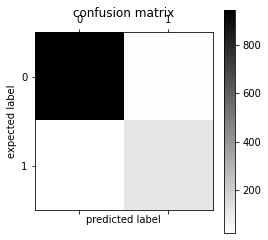

In [ ]:
y_pred3 = model3.predict(X_test)
print(model_assessment(y_test,y_pred3))

## Random Forest

In [ ]:
model4=RandomForestClassifier(n_estimators=20,criterion='entropy')
model4.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

confusion matrix
[[975   1]
 [ 17 122]]
accuracy
0.9838565022421525
precision
0.991869918699187
recall
0.8776978417266187
f-Score
0.9312977099236641
AUC
0.9383366257813421
None


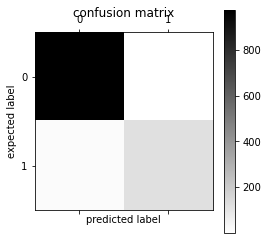

In [ ]:
y_pred4 = model4.predict(X_test)
print(model_assessment(y_test,y_pred4))

In [ ]:
def predict(msg):
    msg = vectorizer.transform([msg])
    print(clf.predict(msg))

In [ ]:
exe = "im doneee. come pick me up" 
exe = process(exe)
predict(exe)

['ham']
